In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rounds2 = pd.read_csv("rounds2.csv",encoding = "latin1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
companies = pd.read_csv("companies.csv",encoding = "latin1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.shape

(114949, 6)

# Data Cleaning

In [6]:
rounds2.company_permalink.isnull().sum()

0

In [7]:
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : x[14:])

In [8]:
rounds2.company_permalink.value_counts()

SOLARFLARE                      10
quellan                          9
EXAGEN-DIAGNOSTICS               9
semprius                         9
QUELLAN                          9
                                ..
z-wave                           1
MONEYVEO                         1
booking-social                   1
mid-america-consulting-group     1
abimate-ee                       1
Name: company_permalink, Length: 90245, dtype: int64

In [9]:
rounds2.company_permalink.describe()

count         114949
unique         90245
top       SOLARFLARE
freq              10
Name: company_permalink, dtype: object

In [10]:
rounds2["company_permalink"]=rounds2["company_permalink"].str.lower()

In [11]:
rounds2.company_permalink.describe()

count         114949
unique         66370
top       solarflare
freq              19
Name: company_permalink, dtype: object

In [12]:
rounds2.company_permalink.value_counts()

solarflare                   19
semprius                     18
exagen-diagnostics           18
quellan                      18
tigo-energy                  17
                             ..
estorian                      1
uchi-navi                     1
acadient                      1
multi-amp-engineering-sdn     1
the-game-creators             1
Name: company_permalink, Length: 66370, dtype: int64

In [13]:
rounds2.company_permalink.isnull().sum()

0

In [14]:
companies.shape

(66368, 10)

In [15]:
companies.permalink.value_counts()

/Organization/Raise5                   1
/Organization/Xtuit-Pharmaceuticals    1
/Organization/Catchme                  1
/Organization/Invotek-Inc              1
/Organization/Prourocare-Medical       1
                                      ..
/Organization/Clearwave                1
/Organization/Neuros-Medical           1
/Organization/99Motos                  1
/Organization/Clicvu                   1
/Organization/Forest-Chemical-Group    1
Name: permalink, Length: 66368, dtype: int64

In [16]:
companies.permalink = companies.permalink.apply(lambda x : x[14:])

In [17]:
companies["permalink"]=companies["permalink"].str.lower()

In [18]:
companies.permalink.value_counts()

docea-power              1
lowdownapp-ltd           1
socialblood-inc          1
primekss                 1
bipar-sciences           1
                        ..
alumnize                 1
endoart                  1
echogen-power-systems    1
rasyonel-r-d             1
the-game-creators        1
Name: permalink, Length: 66368, dtype: int64

In [19]:
companies.permalink.describe()

count           66368
unique          66368
top       docea-power
freq                1
Name: permalink, dtype: object

In [20]:
round(100*companies.isnull().sum()/len(companies.index),2)

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

In [21]:
round(100*rounds2.isnull().sum()/len(rounds2.index),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [22]:
rounds2 = rounds2[-rounds2.raised_amount_usd.isnull()]

In [23]:
rounds2.shape

(94959, 6)

In [24]:
rounds2.rename(columns = {"company_permalink":"permalink"},inplace = True)

# Merging the two dataframes

In [25]:
master_frame = pd.merge(rounds2,companies,how = "inner",on = "permalink")
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,1/7/2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [26]:
master_frame.shape

(94958, 15)

# EDA over master dataframe

In [27]:
master_frame.groupby(["funding_round_type"])["raised_amount_usd"].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
convertible_note,1447.0,1.453439e+06,8.043846e+06,0.0,78847.50,272000.0,1000000.0,1.850483e+08
debt_financing,6682.0,1.704353e+07,2.803204e+08,0.0,330484.25,1100000.0,4000000.0,2.127194e+10
equity_crowdfunding,1228.0,5.383682e+05,1.719329e+06,0.0,7000.00,100000.0,395901.0,2.740000e+07
grant,2124.0,4.300576e+06,2.558742e+07,0.0,50000.00,201684.0,1700000.0,7.500000e+08
non_equity_assistance,73.0,4.112031e+05,1.771747e+06,0.0,25000.00,60000.0,125000.0,1.500000e+07
post_ipo_debt,152.0,1.687046e+08,6.024738e+08,70000.0,4000000.00,19950000.0,60000000.0,5.800000e+09
post_ipo_equity,628.0,8.218249e+07,4.691889e+08,77.0,3764794.00,12262852.5,40000000.0,1.066494e+10
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09


In [28]:
mf_1 = master_frame

In [29]:
mf_1.funding_round_type.value_counts()

venture                  50228
seed                     23602
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

In [30]:
mf_1 = mf_1[mf_1["funding_round_type"] == "venture"]

In [31]:
mf_1.funding_round_type.value_counts()

venture    50228
Name: funding_round_type, dtype: int64

In [32]:
df = mf_1.groupby(["country_code","funding_round_type"])["raised_amount_usd"].sum().sort_values()
df.tail(9)


country_code  funding_round_type
JPN           venture               3.363677e+09
DEU           venture               6.346960e+09
ISR           venture               6.907515e+09
FRA           venture               7.259537e+09
CAN           venture               9.583332e+09
IND           venture               1.439186e+10
GBR           venture               2.024563e+10
CHN           venture               3.983542e+10
USA           venture               4.225108e+11
Name: raised_amount_usd, dtype: float64

In [33]:
mf_1 = mf_1[mf_1["country_code"].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [34]:
df = mf_1.groupby(["country_code","funding_round_type"])["raised_amount_usd"].sum().sort_values(ascending = False)
df

country_code  funding_round_type
USA           venture               4.225108e+11
CHN           venture               3.983542e+10
GBR           venture               2.024563e+10
IND           venture               1.439186e+10
CAN           venture               9.583332e+09
FRA           venture               7.259537e+09
ISR           venture               6.907515e+09
DEU           venture               6.346960e+09
JPN           venture               3.363677e+09
Name: raised_amount_usd, dtype: float64

In [35]:
master_frame['primary_sector'] = master_frame['category_list'].str.split('|').str[0].copy()

In [36]:
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
3,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
4,01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,1/7/2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games


In [37]:
master_frame.primary_sector.value_counts()

Biotechnology              9883
Software                   6083
Advertising                4101
E-Commerce                 3798
Analytics                  3058
                           ... 
Lingerie                      1
Mobile Emergency&Health       1
Social Television             1
Specialty Retail              1
Custom Retail                 1
Name: primary_sector, Length: 715, dtype: int64

# Mapping primary sectors with main sectors

In [38]:
map_file = pd.read_csv("mapping.csv")
map_file.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [39]:
map_file.category_list.value_counts()

Agriculture                1
Machine Learning           1
Office Space               1
Wine And Spirits           1
Cloud Computing            1
                          ..
Web Hosting                1
Enterprise 2.0             1
Biotechnology              1
In-Flight Entertainment    1
Entrepreneur               1
Name: category_list, Length: 687, dtype: int64

In [40]:
map_file.category_list.describe()

count             687
unique            687
top       Agriculture
freq                1
Name: category_list, dtype: object

In [41]:
map_file.category_list.isnull().sum()

1

In [42]:
map_file = map_file[-map_file.category_list.isnull()]

In [43]:
map_file.category_list = map_file.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True) #in category list of map file analytics start with A0lytics

In [44]:
map_file.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [45]:
map_file.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

# Creating dictionary for primary sectors

In [46]:
main_sectors = {
"100000000" : "Automotive & Sports",
"010000000" : "Blanks",
"001000000" : "Cleantech / Semiconductors",
"000100000" : "Entertainment",
"000010000" : "Health",
"000001000" : "Manufacturing",
"000000100" : "News, Search and Messaging",
"000000010" : "Others",
"000000001" : "Social, Finance, Analytics, Advertising"
}

map_file['combined']=map_file.iloc[:,1:].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
map_file['main_sector']=map_file['combined'].apply(lambda x: main_sectors.get(x))
map_file['category'] = map_file['category_list']
map_file.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",combined,main_sector,category
1,3D,0,0,0,0,0,1,0,0,0,000001000,Manufacturing,3D
2,3D Printing,0,0,0,0,0,1,0,0,0,000001000,Manufacturing,3D Printing
3,3D Technology,0,0,0,0,0,1,0,0,0,000001000,Manufacturing,3D Technology
4,Accounting,0,0,0,0,0,0,0,0,1,000000001,"Social, Finance, Analytics, Advertising",Accounting
5,Active Lifestyle,0,0,0,0,1,0,0,0,0,000010000,Health,Active Lifestyle


In [47]:
merged_frame = pd.merge(master_frame, map_file[['category','main_sector']], how='left', left_on=['primary_sector'], right_on=['category'])


In [48]:
merged_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,category,main_sector
0,-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
2,-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,Apps,"News, Search and Messaging"
3,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,Curated Web,"News, Search and Messaging"
4,01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,1/7/2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games,Games,Entertainment


# Results as per constraints

In [49]:
D1 = merged_frame[( merged_frame['country_code']=='USA') & (merged_frame['funding_round_type']=='venture')& (merged_frame['raised_amount_usd']>= 5000000) & (merged_frame['raised_amount_usd']<= 15000000)]


In [50]:
net_sector_USA=D1.groupby(["main_sector"])['raised_amount_usd'].agg([np.size,np.sum])
net_sector_USA['sum']=net_sector_USA['sum'].apply(lambda x: round(x/10**6,5))
net_sector_USA.sort_values(['size'], ascending=False)

,size,sum
main_sector,,
Others,2950.0,26321.00700
"Social, Finance, Analytics, Advertising",2714.0,23807.37696
Cleantech / Semiconductors,2300.0,21206.62819
"News, Search and Messaging",1582.0,13959.56743
Health,909.0,8211.85936
Manufacturing,799.0,7258.55338
Entertainment,591.0,5099.19798
Automotive & Sports,167.0,1454.10436


In [51]:
D2 = merged_frame[( merged_frame['country_code']=='GBR') & (merged_frame['funding_round_type']=='venture')& (merged_frame['raised_amount_usd']>= 5000000) & (merged_frame['raised_amount_usd']<= 15000000)]

In [52]:
net_sector_GBR=D2.groupby(["main_sector"])['raised_amount_usd'].agg([np.size,np.sum])
net_sector_GBR['sum']=net_sector_GBR['sum'].apply(lambda x: round(x/10**6,5))
net_sector_GBR.sort_values(['size'], ascending=False)

,size,sum
main_sector,,
Others,147.0,1283.62429
"Social, Finance, Analytics, Advertising",133.0,1089.40401
Cleantech / Semiconductors,128.0,1150.13966
"News, Search and Messaging",73.0,615.74623
Entertainment,56.0,482.78469
Manufacturing,42.0,361.94034
Health,24.0,214.53751
Automotive & Sports,16.0,167.05157


In [53]:
D3 = merged_frame[( merged_frame['country_code']=='IND') & (merged_frame['funding_round_type']=='venture')& (merged_frame['raised_amount_usd']>= 5000000) & (merged_frame['raised_amount_usd']<= 15000000)]

In [54]:
net_sector_IND=D3.groupby(["main_sector"])['raised_amount_usd'].agg([np.size,np.sum])
net_sector_IND['sum']=net_sector_IND['sum'].apply(lambda x: round(x/10**6,5))
net_sector_IND.sort_values(['size'], ascending=False)

,size,sum
main_sector,,
Others,110.0,1013.40951
"Social, Finance, Analytics, Advertising",60.0,550.54955
"News, Search and Messaging",52.0,433.83454
Entertainment,33.0,280.83000
Manufacturing,21.0,200.90000
Cleantech / Semiconductors,20.0,165.38000
Health,19.0,167.74000
Automotive & Sports,13.0,136.90000


In [55]:
net_sector_USA['size'].sum()

12012.0

In [56]:
net_sector_USA['sum'].sum()

107318.29466

In [57]:
net_sector_GBR['size'].sum()

619.0

In [58]:
net_sector_GBR['sum'].sum()

5365.2283

In [59]:
net_sector_IND['size'].sum()

328.0

In [60]:
net_sector_IND['sum'].sum()

2949.5436

In [61]:
d1 = D1


In [62]:
d1= d1[(d1["main_sector"] == "Others")]

In [63]:
company_d1=d1.groupby(["permalink"])['raised_amount_usd'].agg([np.size,np.sum])
company_d1['sum']=company_d1['sum'].apply(lambda x: round(x/10**6,5))
company_d1.sort_values(['sum'], ascending=False)

,size,sum
permalink,,
virtustream,6.0,64.30000
capella,6.0,54.96805
airtight-networks,5.0,54.20191
decarta,5.0,52.10000
black-duck-software,6.0,51.00000
...,...,...
startforce,1.0,5.00000
lumeta,1.0,5.00000
storenvy,1.0,5.00000


In [64]:
d2 = D2

In [65]:
d2= d2[(d2["main_sector"] == "Others")]

In [66]:
company_d2=d2.groupby(["permalink"])['raised_amount_usd'].agg([np.size,np.sum])
company_d2['sum']=company_d2['sum'].apply(lambda x: round(x/10**6,5))
company_d2.sort_values(['sum'], ascending=False)

,size,sum
permalink,,
electric-cloud,4.0,37.00000
sensage,4.0,36.25000
enigmatic,3.0,32.50000
silverrail-technologies,3.0,29.00000
opencloud,3.0,27.97277
...,...,...
vector-watch,1.0,5.00000
udex,1.0,5.00000
bullguard,1.0,5.00000


In [67]:
d3 = D3

In [68]:
d3= d3[(d3["main_sector"] == "Others")]

In [69]:
company_d3=d3.groupby(["permalink"])['raised_amount_usd'].agg([np.size,np.sum])
company_d3['sum']=company_d3['sum'].apply(lambda x: round(x/10**6,5))
company_d3.sort_values(['sum'], ascending=False)

,size,sum
permalink,,
firstcry-com,3.0,39.0
myntra,4.0,38.0
commonfloor,3.0,32.9
pepperfry-com,3.0,28.0
itzcash-card-ltd,2.0,25.0
...,...,...
liases-foras,1.0,5.0
securens,1.0,5.0
appsdaily-solutions,1.0,5.0


In [70]:
d11 = D1
d22 = D2
d33 = D3

In [71]:
d11= d11[(d11["main_sector"] == "Social, Finance, Analytics, Advertising")]
d22= d22[(d22["main_sector"] == "Social, Finance, Analytics, Advertising")]
d33= d33[(d33["main_sector"] == "Social, Finance, Analytics, Advertising")]

In [72]:
company_d11=d11.groupby(["permalink"])['raised_amount_usd'].agg([np.size,np.sum])
company_d11['sum']=company_d11['sum'].apply(lambda x: round(x/10**6,5))
company_d11.sort_values(['sum'], ascending=False)

,size,sum
permalink,,
shotspotter,7.0,67.93301
demandbase,5.0,63.00000
intacct,5.0,61.80000
netbase,7.0,60.60000
lotame,5.0,59.70000
...,...,...
liquid-m,1.0,5.00000
linksmart,1.0,5.00000
orangesoda,1.0,5.00000


In [73]:
company_d22=d22.groupby(["permalink"])['raised_amount_usd'].agg([np.size,np.sum])
company_d22['sum']=company_d22['sum'].apply(lambda x: round(x/10**6,5))
company_d22.sort_values(['sum'], ascending=False)

,size,sum
permalink,,
celltick-technologies,4.0,37.50000
mythings,4.0,34.00000
zopa,3.0,32.90000
imagini,3.0,28.55000
marketinvoice,3.0,25.55301
...,...,...
moo,1.0,5.00000
rangespan,1.0,5.00000
the-fizzback-group,1.0,5.00000


In [74]:
company_d33=d33.groupby(["permalink"])['raised_amount_usd'].agg([np.size,np.sum])
company_d33['sum']=company_d33['sum'].apply(lambda x: round(x/10**6,5))
company_d33.sort_values(['sum'], ascending=False)

,size,sum
permalink,,
manthan-systems,4.0,50.70000
komli-media,3.0,28.00000
shopclues-com,2.0,25.00000
intarvo,2.0,21.90000
grameen-financial-services,2.0,21.55605
bankbazaar,2.0,19.00000
microland,2.0,18.30000
eka-software-solutions,2.0,16.00000
qyuki,2.0,15.40000


In [75]:
mf_2 = merged_frame

In [76]:
mf_2.funding_round_type.value_counts()

venture                  50228
seed                     23602
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

In [77]:
mf_2 = mf_2[mf_2["funding_round_type"].isin(["venture","seed","angel","private_equity"])]

In [78]:
mf_2.funding_round_type.value_counts()

venture           50228
seed              23602
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

In [79]:
df = mf_2.groupby(["funding_round_type"])["raised_amount_usd"].mean()
df

funding_round_type
angel             9.586945e+05
private_equity    7.330859e+07
seed              7.197796e+05
venture           1.174895e+07
Name: raised_amount_usd, dtype: float64

In [80]:
mf_2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,category,main_sector
0,-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
2,-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,Apps,"News, Search and Messaging"
3,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,Curated Web,"News, Search and Messaging"
5,0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11/9/2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Biotechnology,Cleantech / Semiconductors


In [81]:
mf_2.raised_amount_usd = mf_2.raised_amount_usd.apply(lambda x : x/10**6)

/home/ujjwal/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [82]:
mf_2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,category,main_sector
0,-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10.000000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,0.700000,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
2,-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.406878,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,Apps,"News, Search and Messaging"
3,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,Curated Web,"News, Search and Messaging"
5,0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11/9/2009,0.043360,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Biotechnology,Cleantech / Semiconductors


In [83]:
df = mf_2.groupby(["funding_round_type"])["raised_amount_usd"].mean()
df

funding_round_type
angel              0.958694
private_equity    73.308593
seed               0.719780
venture           11.748949
Name: raised_amount_usd, dtype: float64

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=mf_2, estimator=np.mean)
plt.axhline(5, color='green')
plt.axhline(15, color='red')
plt.show()

In [ ]:
mf_2 = mf_2[mf_2["country_code"].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [ ]:
mf_2 = mf_2[mf_2["funding_round_type"].isin(["venture"])]

In [ ]:
df = mf_2.groupby(["country_code"])["raised_amount_usd"].mean().sort_values(ascending = False)
df

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='country_code', y='raised_amount_usd', data=mf_2, estimator=np.mean)
plt.show()

In [ ]:
mf_2 = mf_2[mf_2["country_code"].isin(["USA","GBR","IND"])]

In [ ]:
mf_2 = mf_2[mf_2.raised_amount_usd<=15]

In [ ]:
mf_2 = mf_2[mf_2.raised_amount_usd>=5]

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='country_code', y='raised_amount_usd', hue='main_sector', data=mf_2,estimator = np.mean)
plt.show()

In [ ]:
mf_2.groupby(["country_code","main_sector"])["raised_amount_usd"].mean()

In [ ]:
mf_usa = mf_2


In [ ]:
mf_usa = mf_usa[mf_usa["country_code"].isin(["USA"])]


In [ ]:
mf_usa["country_code"].value_counts()

In [ ]:
mf_usa = mf_usa[mf_usa["main_sector"].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]

In [ ]:
mf_usa["main_sector"].value_counts()

In [362]:
mf_gbr = mf_2

In [363]:
mf_gbr = mf_gbr[mf_gbr["country_code"].isin(["GBR"])]

In [364]:
mf_gbr["country_code"].value_counts()

GBR    628
Name: country_code, dtype: int64

In [365]:
mf_gbr = mf_gbr[mf_gbr["main_sector"].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]

In [366]:
mf_gbr["main_sector"].value_counts()

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
Name: main_sector, dtype: int64

In [367]:
mf_ind = mf_2

In [368]:
mf_ind = mf_ind[mf_ind["country_code"].isin(["IND"])]

In [369]:
mf_ind["country_code"].value_counts()

IND    330
Name: country_code, dtype: int64

In [370]:
mf_ind = mf_ind[mf_ind["main_sector"].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]



In [371]:
mf_ind["main_sector"].value_counts()

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: main_sector, dtype: int64

# Top three best sectors

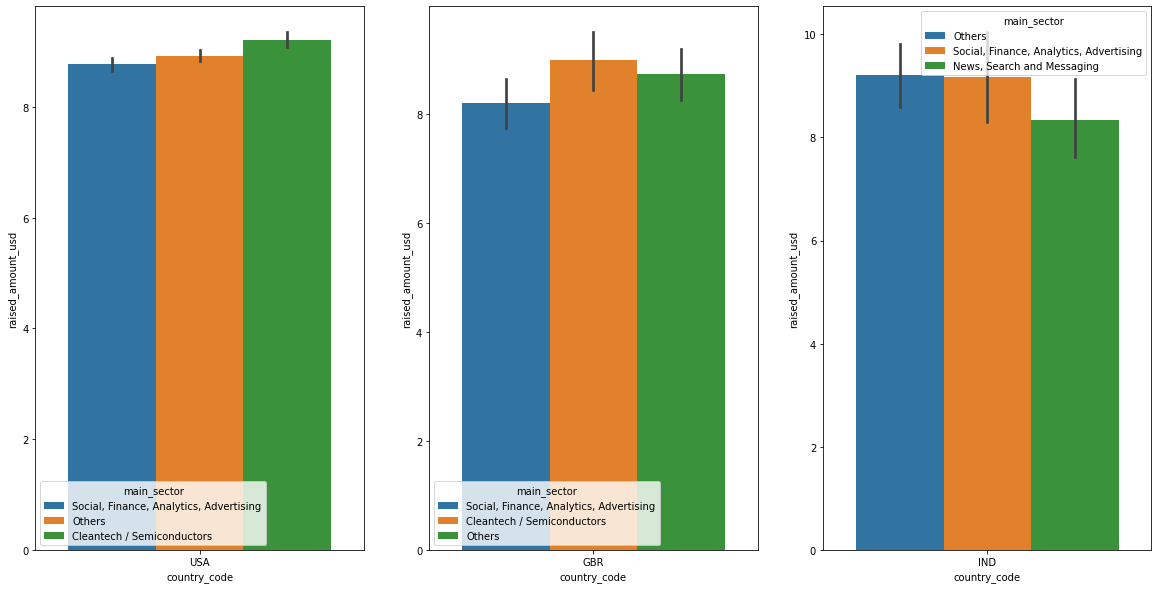

In [373]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.barplot(x='country_code', y='raised_amount_usd', hue='main_sector', data=mf_usa,estimator = np.mean)

plt.subplot(1,3,2)
sns.barplot(x='country_code', y='raised_amount_usd', hue='main_sector', data=mf_gbr,estimator = np.mean)

plt.subplot(1,3,3)
sns.barplot(x='country_code', y='raised_amount_usd', hue='main_sector', data=mf_ind,estimator = np.mean)

plt.show()

In [374]:
mf_usa.groupby(["country_code","main_sector"])["raised_amount_usd"].mean()

country_code  main_sector                            
USA           Cleantech / Semiconductors                 9.220273
              Others                                     8.922375
              Social, Finance, Analytics, Advertising    8.772062
Name: raised_amount_usd, dtype: float64

In [375]:
mf_gbr.groupby(["country_code","main_sector"])["raised_amount_usd"].mean()

country_code  main_sector                            
GBR           Cleantech / Semiconductors                 8.985466
              Others                                     8.732138
              Social, Finance, Analytics, Advertising    8.191008
Name: raised_amount_usd, dtype: float64

In [376]:
mf_ind.groupby(["country_code","main_sector"])["raised_amount_usd"].mean()

country_code  main_sector                            
IND           News, Search and Messaging                 8.342972
              Others                                     9.212814
              Social, Finance, Analytics, Advertising    9.175826
Name: raised_amount_usd, dtype: float64